<a href="https://colab.research.google.com/github/SaxenaKushagr/Big-Basket-Analysis/blob/main/EDA_Big_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/008 - My Projects/Big Basket Mini/BigBasket Products.csv'
df = pd.read_csv(data)

In [ ]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
                '''Beginning by exploring the dataset'''
'''Understanding the structure of data, the Dtypes of variables available, and the general patterns'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
'''Descriptive Statistics about our dataset'''

df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [ ]:
#As soon as we perform Exploratory and Descriptive analysis, we can now begin Data Cleaning.

In [ ]:
'''Let's drop any duplicate entries and check the shape of our dataset'''

df.drop_duplicates()
df.shape

(27555, 10)

In [ ]:
'''Let's find Null/Missing values in our dataset(Column-wise)'''

df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [ ]:
'''Total Number of Null values in our dataset'''

df.isnull().sum().sum()

8759

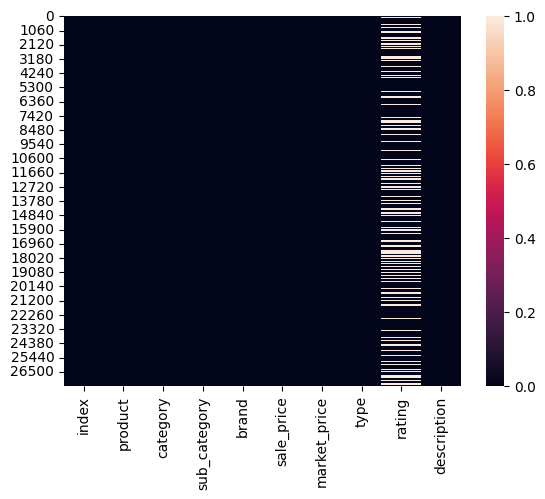

In [ ]:
'''Heatmap of Null values'''

sns.heatmap(df.isnull())
plt.show()

In [ ]:
'''We need to fill these missing values with the appropriate values, which enables us analyse better insights from our dataset'''
'''The reason to fill Null/Missing values is that we can't analyse the data without it'''

#For Categorical features like

# Filling null values in 'brand' with 'No brand provided'.
df['brand'].fillna('No brand provided', inplace=True)

# Filling null values in 'product' with 'Product is not specified'.
df['product'].fillna('Product is not specified', inplace=True)

# Dropping 'description' as it is a string which isn't adding any value to our analysis.
df.drop('description', axis=1, inplace=True)

In [ ]:
#For Numerical features like

'''sale_price'''
'''rating'''

#First calculate the percentage of Null values specifically column-wise.
df.isnull().sum()/df.shape[0]*100

,0
index,0.000000
product,0.000000
category,0.000000
sub_category,0.000000
brand,0.000000
sale_price,0.021775
market_price,0.000000
type,0.000000
rating,31.340954


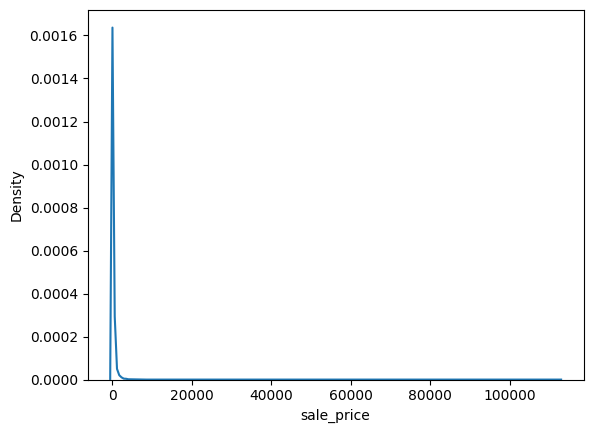

In [ ]:
'''Feature - sale_price'''

# Checking the distribution of feature 'sale_price'

sns.kdeplot(df['sale_price'])
plt.show()

In [ ]:
# The feature 'sale_price' is positively skewed.

median_value = df['sale_price'].median()
median_value

190.32

In [ ]:
# So Filling the Null values in this feature by Median.

df['sale_price'] = df['sale_price'].fillna(median_value).astype(float)

In [ ]:
'''Outliers handling in feature 'sale_price' by IQR Method.'''

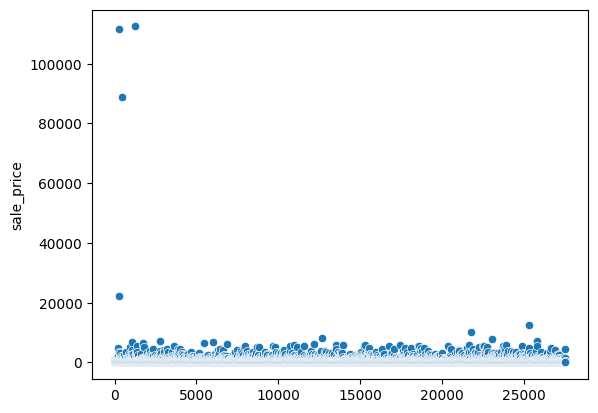

In [ ]:
sns.scatterplot(df['sale_price'])
plt.show()

In [ ]:
# Calculating IQR for Feature 'sale_price'.

Q1 = df['sale_price'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['sale_price'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 95.0
Q3 is 359.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 264.0


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-301.0
755.0


In [ ]:
# Identifying outliers.

# Our feature 'sale_price' lies between -301.0 and 755.0 as per IQR Method, therefore any value below -301.0 and beyond 755.0 is considered as outliers.

outliers = df[(df['sale_price'] < lower_bound) | (df['sale_price'] > upper_bound)]
outliers

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5
47,48,Colour Catcher Sheets,Cleaning & Household,All Purpose Cleaners,Dylon,799.00,799.0,Imported Cleaners,4.0
51,52,Peach Syrup,Gourmet & World Food,Drinks & Beverages,Pekers,850.00,850.0,Gourmet Juices & Drinks,4.2
69,70,"Padded Harness - 3/4 inch, Grey Colour","Kitchen, Garden & Pets",Pet Food & Accessories,Glenand,840.00,840.0,Pet Collars & Leashes,NaN
91,92,Hard Anodised Ezee-Pour Saucepan With Lid - L88,"Kitchen, Garden & Pets",Cookware & Non Stick,Hawkins Futura,864.50,910.0,Tawa & Sauce Pan,4.6
...,...,...,...,...,...,...,...,...,...
27498,27499,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,1071.00,1071.0,Kitchen Tools & Other Accessories,2.0
27505,27506,Virgin Coconut Oil,"Foodgrains, Oil & Masala",Edible Oils & Ghee,Merkera,875.00,875.0,Other Edible Oils,NaN
27514,27515,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,1615.50,1795.0,Perfume,NaN
27538,27539,Quista Pro Advanced Whey Protein Formula forti...,Beauty & Hygiene,Health & Medicine,Himalaya,4500.00,4500.0,Supplements & Proteins,4.0


In [ ]:
# Replacing Outliers with Median.

df['sale_price'] = np.where((df['sale_price'] < lower_bound) | (df['sale_price'] > upper_bound), median_value, df['sale_price'])
print(df['sale_price'])

0        220.00
1        180.00
2        119.00
3        149.00
4        162.00
          ...  
27550    199.20
27551     67.50
27552    200.00
27553    396.00
27554    214.53
Name: sale_price, Length: 27555, dtype: float64


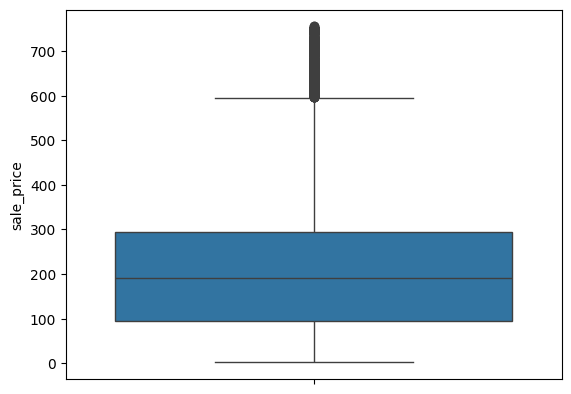

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['sale_price'])
plt.show()

In [ ]:
# Calculating IQR for 'sale_price' again after the previous transformations.

Q1 = df['sale_price'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['sale_price'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 95.0
Q3 is 295.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 200.0


In [ ]:
# Defining new outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-205.0
595.0


In [ ]:
# Now, instead of replacing with Median, Capping the outliers to boundary values.

df['sale_price'] = np.where(df['sale_price'] < lower_bound, lower_bound, df['sale_price'])
df['sale_price'] = np.where(df['sale_price'] > upper_bound, upper_bound, df['sale_price'])

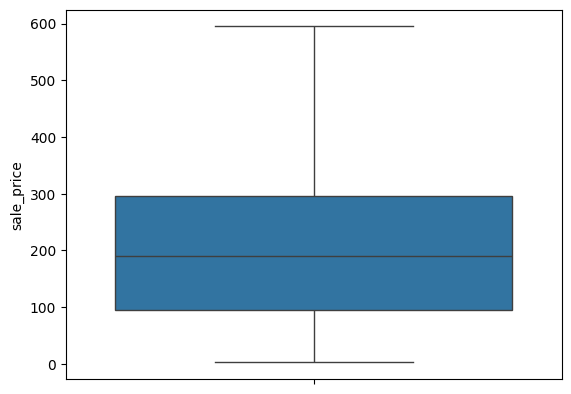

In [ ]:
# Checking our Distribution again.

sns.boxplot(df['sale_price'])
plt.show()

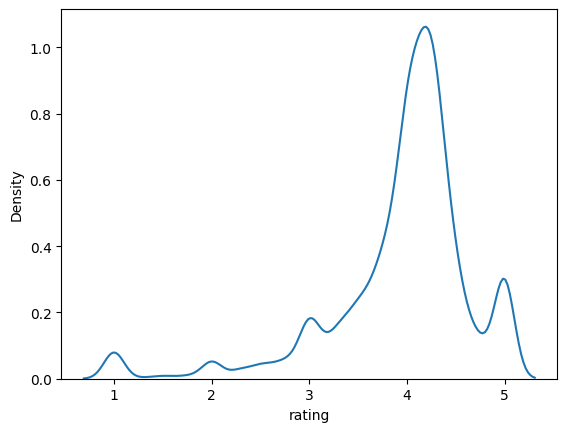

In [ ]:
'''Feature - rating'''

# Checking the distribution of feature 'rating'

sns.kdeplot(df['rating'])
plt.show()

In [ ]:
# 'Rating' is from 1 to 5 and there isn't any outlier exist in this feature but we see that 'rating' is negatively skewed.

median_rating = df['rating'].median()
median_rating

4.1

In [ ]:
# So Filling the Null values in this feature by Median.

df['rating'] = df['rating'].fillna(median_rating).astype(float)

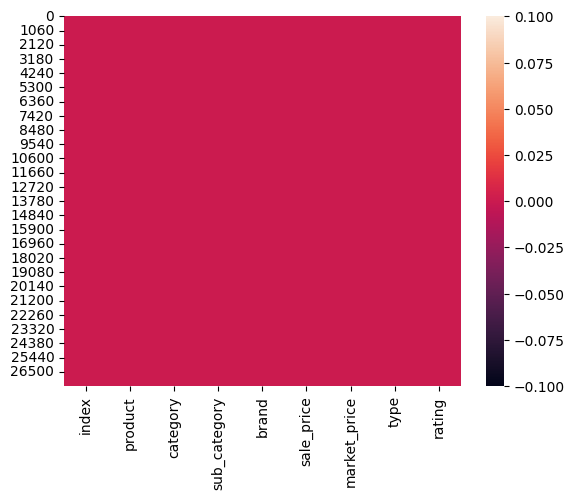

In [ ]:
'''Let's draw a HEATMAP to ensure all Null values has been handled'''
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# NOTE

# As all the Outliers and Null values in above features has been handled, We still have one Numerical features left to check at least for Outliers.
# The feature is 'market_price'.

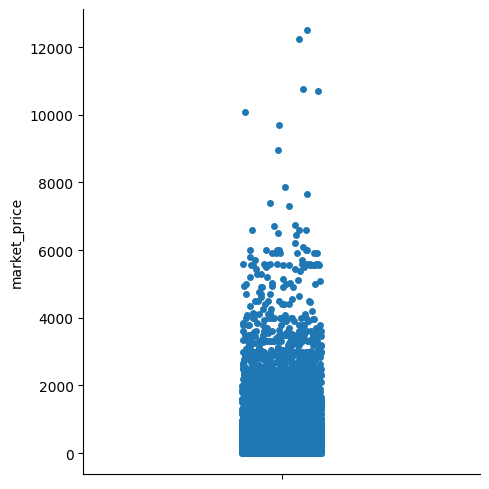

In [ ]:
'''Feature - market_price'''

# Drawing a catplot of feature 'market_price' for checking if there's any outliers exist

sns.catplot(df['market_price'])
plt.show()

In [ ]:
'''Outliers handling in feature 'market_price' by IQR Method.'''

In [ ]:
# Calculating IQR for 'market_price'.

Q1 = df['market_price'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['market_price'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 100.0
Q3 is 425.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 325.0


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-387.5
912.5


In [ ]:
# Identifying outliers.

# Our feature 'market_price' lies between -387.5 and 912.5 as per IQR Method, therefore any value below -387.5 and beyond 912.5 is considered as an outlier.

outliers = df[(df['market_price'] < lower_bound) | (df['market_price'] > upper_bound)]
outliers

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,190.32,1098.0,Shampoo & Conditioner,3.5
34,35,Pet Solitaire Container Set - Silver,"Kitchen, Garden & Pets",Storage & Accessories,Steelo,499.00,969.0,Containers Sets,3.9
96,97,Hair Remover Spray - Foam Lemon,Beauty & Hygiene,Feminine Hygiene,Dimples,190.32,1200.0,Hair Removal,4.1
99,100,"Wonder Diaper Pants - Xtra Large, 12-17 Kg",Baby Care,Diapers & Wipes,Huggies,190.32,1398.0,Diapers,4.0
118,119,"Adult Dry Cat Food - +1 Year, Ocean Fish","Kitchen, Garden & Pets",Pet Food & Accessories,Maxi Persian,190.32,999.0,Pet Meals & Treats,4.1
...,...,...,...,...,...,...,...,...,...
27488,27489,"Cranberry - Dried, Sliced",Gourmet & World Food,"Snacks, Dry Fruits, Nuts",Rostaa,190.32,980.0,Dry Fruits & Berries,4.1
27498,27499,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,190.32,1071.0,Kitchen Tools & Other Accessories,2.0
27514,27515,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,190.32,1795.0,Perfume,4.1
27538,27539,Quista Pro Advanced Whey Protein Formula forti...,Beauty & Hygiene,Health & Medicine,Himalaya,190.32,4500.0,Supplements & Proteins,4.0


In [ ]:
# Checking Median.

median_market_price = df['market_price'].median()
median_market_price

220.0

In [ ]:
# Replacing Outliers in 'market_price' with Median

df['market_price'] = np.where((df['market_price'] < lower_bound) | (df['market_price'] > upper_bound), median_market_price, df['market_price'])

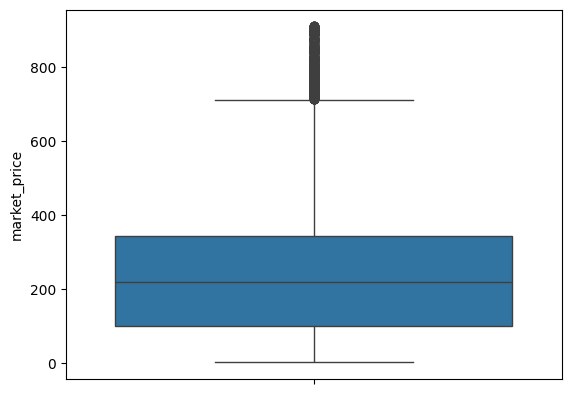

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['market_price'])
plt.show()

In [ ]:
# Calculate the IQR for 'market_price' again after the previous transformations.

Q1 = df['market_price'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['market_price'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 100.0
Q3 is 345.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 245.0


In [ ]:
# Defining new outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-267.5
712.5


In [ ]:
# Now, instead of replacing with Median, Capping the outliers to boundary values.

df['market_price'] = np.where(df['market_price'] < lower_bound, lower_bound, df['market_price'])
df['market_price'] = np.where(df['market_price'] > upper_bound, upper_bound, df['market_price'])

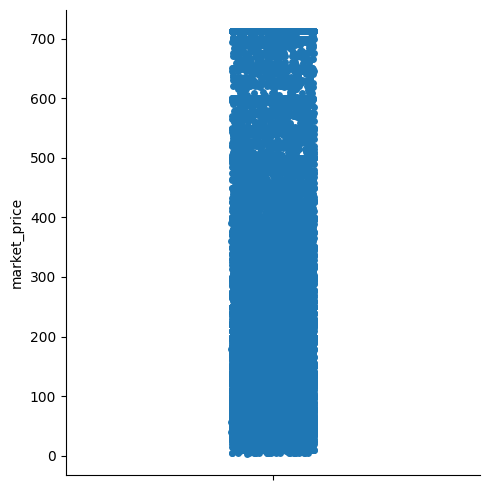

In [ ]:
# Checking our Distribution again.

sns.catplot(df['market_price'])
plt.show()

In [ ]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,27555.000000
mean,13778.00000,212.990196,249.555412,3.992408
std,7954.58767,152.020223,183.080616,0.616814
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,4.000000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,295.000000,345.000000,4.200000
max,27555.00000,595.000000,712.500000,5.000000


In [ ]:
'''Question 1 - Use head function to look for first 12 rows.'''

df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,190.32,220.0,Shampoo & Conditioner,3.5
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3


In [ ]:
'''Question 2 - Get Description of the data in the DataFrame.'''

df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,27555.000000
mean,13778.00000,212.990196,249.555412,3.992408
std,7954.58767,152.020223,183.080616,0.616814
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,4.000000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,295.000000,345.000000,4.200000
max,27555.00000,595.000000,712.500000,5.000000


In [ ]:
'''Question 3 - : Find Information about the DataFrame.'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        27555 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
'''Question 4 - Find out Top and least sold products (at least 5).'''

# Top 5 sold products are as follows:

df['product'].value_counts().reset_index().head(5)

,product,count
0,Turmeric Powder/Arisina Pudi,26
1,Extra Virgin Olive Oil,15
2,Cow Ghee/Tuppa,14
3,Soft Drink,12
4,Colorsilk Hair Colour With Keratin,12


In [ ]:
# Bottom 5 least sold products are as follows:

df['product'].value_counts().reset_index().tail(5)

,product,count
23536,Sauteed Onion & Garlic Pasta Sauce,1
23537,Pepper & Herb Salami Chicken,1
23538,Nutmeg Powder,1
23539,Disney Mickey Mouse Plastic Kids Sipper Bottle...,1
23540,Green Tea - Pure Original,1


In [ ]:
'''Question 5 - Measuring discount on a certain item.'''

# Let's create a function for the same.
# It can calculate discount of any item in our dataset.
# We need to enter the index number of concerned article.

def calculate_discount(market_price, sale_price):

  """Calculates the discount percentage for an item.
  Args:
    market_price: The original price of the item.
    sale_price: The discounted price of the item.
  Returns:
    The discount percentage as a float."""

  discount = (market_price - sale_price) / market_price * 100
  return discount

In [ ]:
# Let's calculate the discount on 'Ceramic Barrel Brush', which is at 20th index.

market_price = df['market_price'][20]
sale_price = df['sale_price'][20]

# putting the values in our user-defined function.

discount = calculate_discount(market_price, sale_price)

print(f"The discount on the item is {discount:.2f}%")

The discount on the item is 25.00%


In [ ]:
# Again calculate the discount on 'Woman - Pure Body Mist', which is at 14,988 index.

market_price = df['market_price'][14988]
sale_price = df['sale_price'][14988]

# putting the values in our user-defined function.

discount = calculate_discount(market_price, sale_price)

print(f"The discount on the item is {discount:.2f}%")

The discount on the item is 20.00%


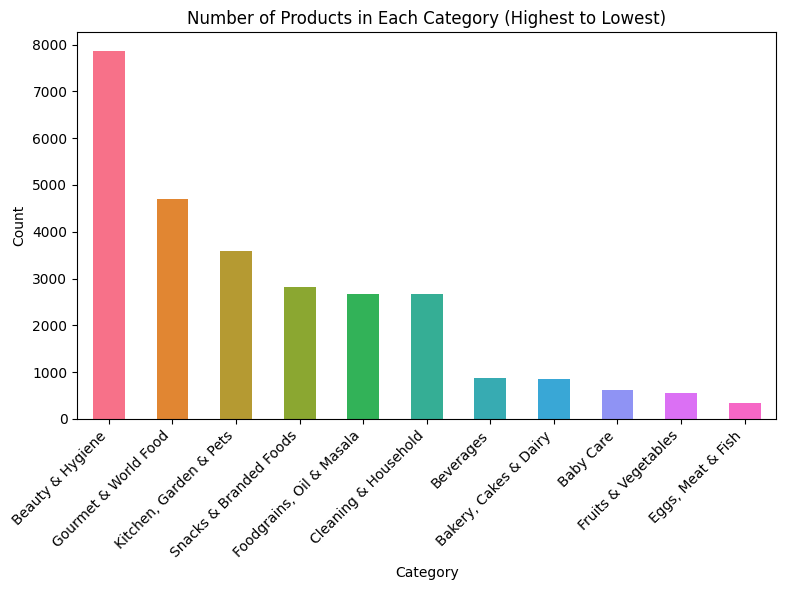

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Plot the distribution of number of products in each Category.'''

category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 6))

# Set the color palette
colors = sns.color_palette('husl', len(category_counts))

# Create a bar chart
category_counts.plot(kind='bar', color = colors)
plt.title('Number of Products in Each Category (Highest to Lowest)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# The category "Beauty & Hygiene" has the highest number of products. This suggests that Big Basket has a strong focus on this category followed by "Gourmet & World Food".

# The categories "Snacks & Branded Foods" and "Foodgrains, Oil & Masala" also have a significant number of products.
# These are essential categories that are likely to be in high demand.

# The categories "Fruits & Vegetables" and "Eggs, Meat & Fish" have a relatively smaller number of products.
# Big Basket may want to consider expanding their offerings in these categories to cater to a wider range of customer needs.

# Overall, the distribution of products across categories provides insights into Big Basket's focus areas and potential areas for growth.

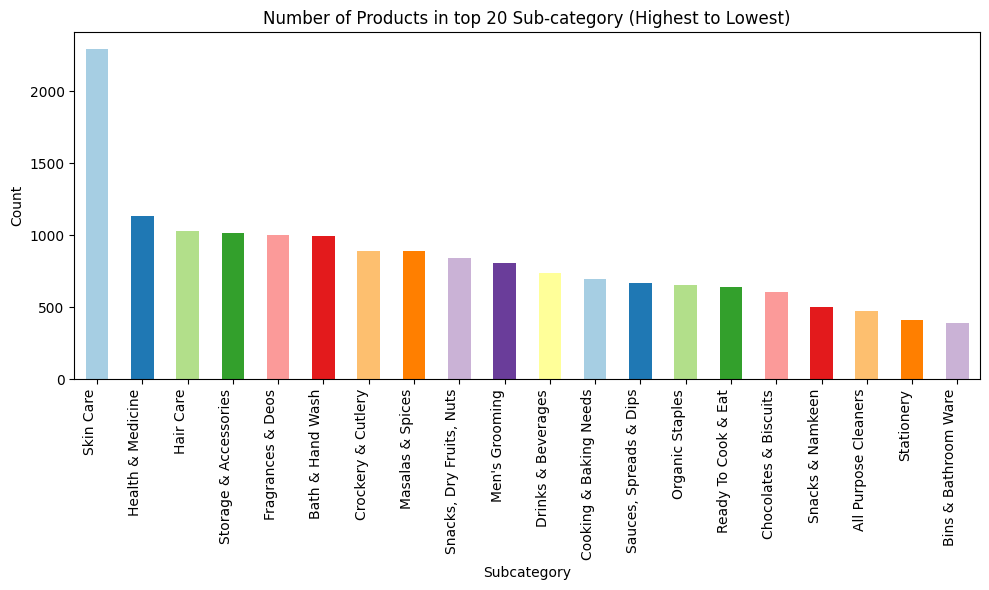

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Plot the distribution of number of products in Top 20 Sub-category.'''

subcategory_counts = df['sub_category'].value_counts().head(20)
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette('Paired', len(category_counts))

# Create a bar chart
subcategory_counts.plot(kind='bar', color=colors)
plt.title('Number of Products in top 20 Sub-category (Highest to Lowest)')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "Skin Care" is the leading sub-category with the highest number of products. "Health & Medicine" follows closely behind "Skin Care" in terms of product count.

# There's a significant drop in product count after the top 3 categories ("Skincare", "Health & Medicine", and "Hair Care").

# It should be noted that all top 3 Sub-categories belongs to category "Beauty & Hygiene" estamitaing that Big Basket focus more on these categories.

# The remaining sub-categories have relatively similar product counts, with some fluctuations.

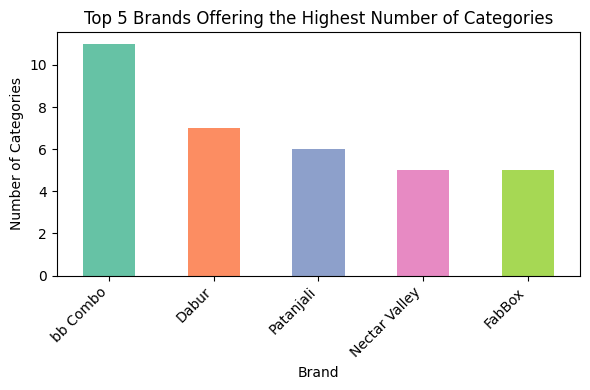

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Draw a visualization of Top 5 brands with most number of Categories.'''

brand_category_counts = df.groupby('brand')['category'].nunique().sort_values(ascending=False)
plt.figure(figsize=(6, 4))

# Set the color palette
colors = sns.color_palette('Set2', len(category_counts))

# Create a bar chart
brand_category_counts.head(5).plot(kind='bar', color = colors)
plt.title('Top 5 Brands Offering the Highest Number of Categories')
plt.xlabel('Brand')
plt.ylabel('Number of Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "bb Combo" is the clear leader in terms of the number of categories offered with offering products in all 11 categories.
# To increase sales, BigBasket should prioritize support for these brands.

# There's a significant drop in the number of categories offered by the subsequent brands ("Dabur", "Patanjali", "Nectar Valley", and "FabBox").

# The remaining four brands have a relatively similar number of categories, with slight variations.

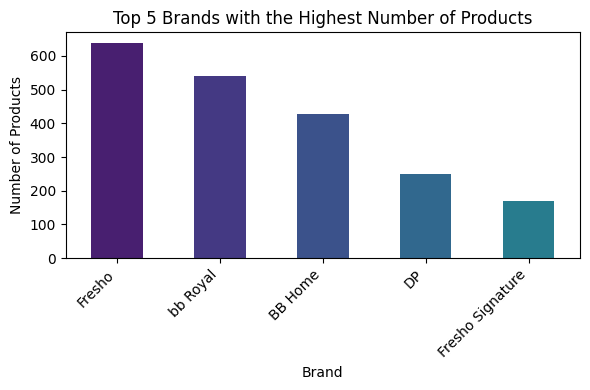

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Draw a visualization of Top 5 brands offering highest number of products.'''

top_5_brands = df['brand'].value_counts().nlargest(5)
plt.figure(figsize=(6, 4))

# Set the color palette
colors = sns.color_palette('viridis', len(category_counts))

# Create a bar chart
top_5_brands.plot(kind='bar', color = colors)
plt.title('Top 5 Brands with the Highest Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "Fresho" is the dominant brand with the highest number of products offered on Big Basket, followed by "bb Royal", "BB Home".

# Note that top 3 brands of this graph are selling Groceries, which are either fresh fruits/vegetables, Rice/Flour or Cutlery/Cookware.

# Which makes clear sense as Big Basket is all about online supermarket selling Groceries of various type.

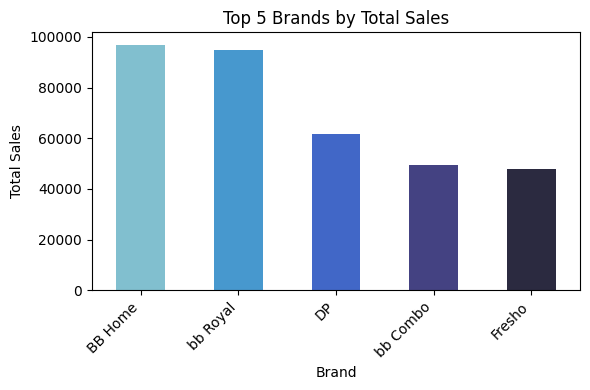

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Draw a visualization of Top 5 brands by Total Sales.'''

top_brands_by_sales = df.groupby('brand')['sale_price'].sum().nlargest(5)
plt.figure(figsize=(6, 4))

# Set the color palette
colors = sns.color_palette('icefire', len(category_counts))

# Create a bar chart
top_brands_by_sales.plot(kind='bar', color = colors)
plt.title('Top 5 Brands by Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "BB Home" and "bb Royal" is the clear leader in terms of total sales, indicating their popularity and strong customer preference among Big Basket users.

# This suggests that "BB Home" and "bb Royal" holds a dominant position in the market and is a key contributor to Big Basket's revenue.

# It also seems that brands with the prefix "BB" are affiliated companies of a single larger corporation, similar to Reliance Fresh.

# The remaining brands, "bb Combo" & "Fresho", have significantly lower total sales compared to Top 3 performers.

# Big Basket could consider strategies to further leverage the popularity of all "BB" Brands while also focusing on promoting other brands to diversify its sales and potentially capture a larger market share.

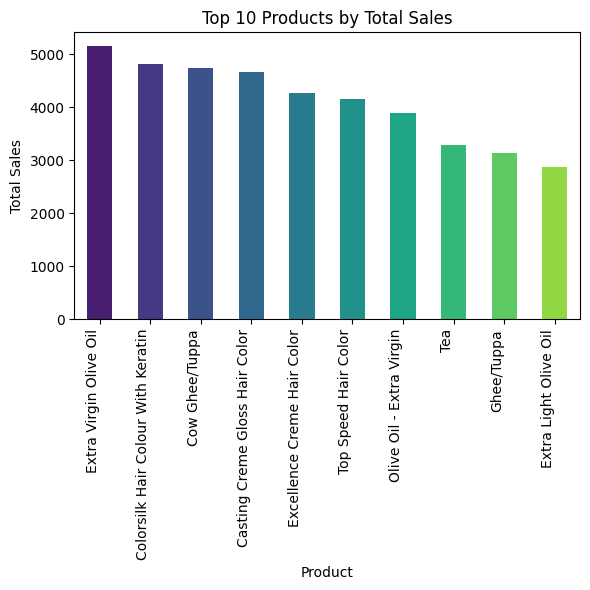

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''BAR CHART: Draw a visualization of Top 10 products by Total Sales.'''

top_products_by_sales = df.groupby('product')['sale_price'].sum().nlargest(10)
plt.figure(figsize=(6, 6))

# Set the color palette
colors = sns.color_palette('viridis', len(category_counts))

# Create a bar chart
top_products_by_sales.plot(kind='bar', color = colors)
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "Extra Virgin Olive Oil" is the top-selling product, with sales significantly higher than the other products.

# "Colorsilk Hair Colour With Keratin" is the second best-selling product, followed closely by "Cow Ghee/Tuppa" and "Casting Creme Gloss Hair Color".

# The following three products, "Excellence Creme Hair Color", "Top Speed Hair Color", and "Olive Oil - Extra Virgin" have relatively similar sales figures, with "Excellence Creme Hair Color" being slightly ahead.

# Note that Top 10 products list is significantly dominated with "Beauty" (4 Products) and "Foodgrains/Gourmet" related items (5 Products). This finding aligns with our previous analysis in Question 6 (Part 1).

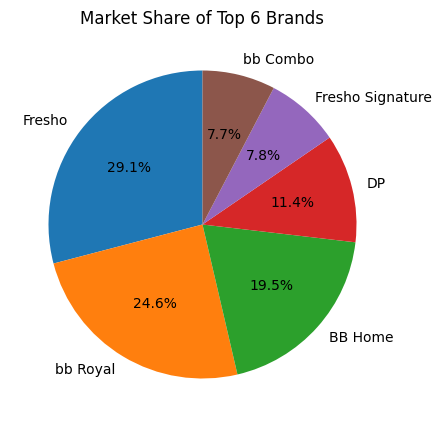

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''Brand Analysis'''
'''PIE CHART: Draw a visualization of Top 6 Brands to show their Market Share.'''

top_6_brands = df['brand'].value_counts().nlargest(6)
plt.figure(figsize=(5, 5))

# Set the color palette
colors = sns.color_palette('pastel')

# Create a pie chart
plt.pie(top_6_brands, labels=top_6_brands.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share of Top 6 Brands')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# "Fresho" commands the largest market share with 29.1% among the top 6 brands, indicating its strong presence and popularity on Big Basket.

# "bb Royal" and "BB Home" also hold significant market shares with 24.6% and 19.5%, suggesting their strong brand recognition and customer loyalty.

# The chart reveals that Big Basket offers a diverse product range, encompassing categories like Baby care ("bb Combo"), Cleaning & Household ("DP"), Garden & Pets ("BB Home").

# BigBasket could consider strategies to further strengthen the market position of "Fresho", "bb Royal", and "BB Home" while also exploring ways to increase the market share of other brands.

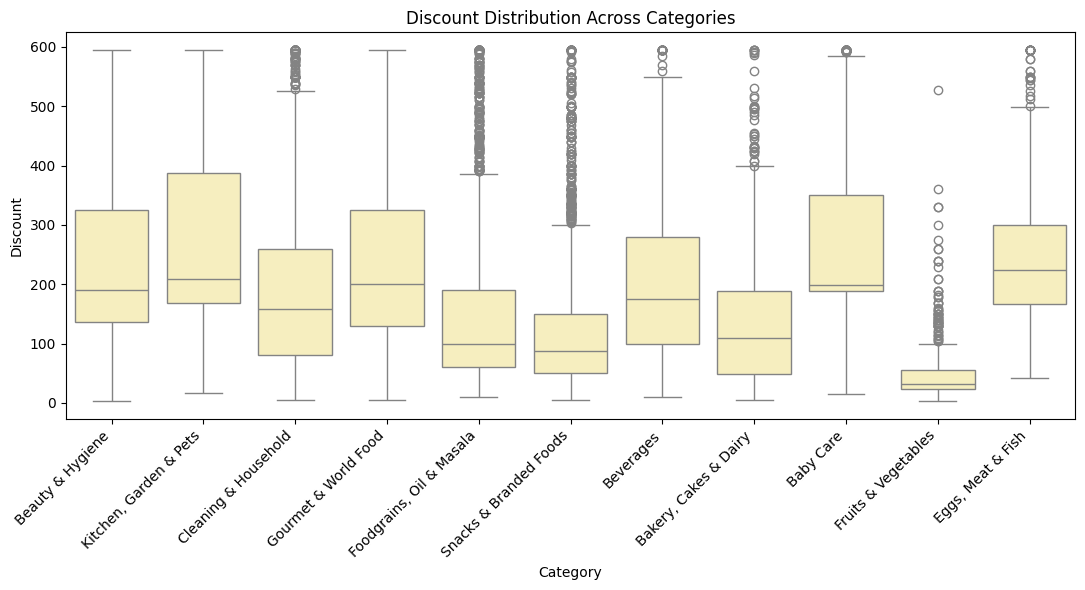

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''Discount Analysis'''
'''BOXPLOT: Draw a visualization to compare Discount Distributions across Categories'''

plt.figure(figsize=(11, 6))

# Set the color palette
colors = sns.color_palette('YlOrBr')

# Create a boxplot
sns.boxplot(x='category', y='sale_price', color=colors[0], data=df)
plt.title('Discount Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# **Price Variability:** The box plot reveals the spread of prices within each category.
# Categories with longer boxes indicate a wider range of prices for products within that category.

# **Median Prices:** The horizontal line within each box represents the median price.
# This allows you to quickly compare the typical price point of products across different categories.

# **Outliers:** The dots outside the whiskers of the box plot represent outlier prices.
# These are products that are significantly more expensive or cheaper than the majority of products within their category.

# **Category Comparisons:** By comparing the positions and sizes of the boxes, you can identify categories with higher or lower overall prices
# and those with greater or lesser price variability.

'''**Potential Business Implications**'''

# **Pricing Strategy:** This visualization can inform pricing decisions for new products or adjustments to existing pricing.
# Like if you see a category with a high median price and low variability, you might consider introducing a lower-priced product to capture a different market segment.

# **Inventory Management:** Understanding price distributions can help with inventory management.
# Categories with a wide range of prices might require a more diverse inventory strategy compared to categories with a narrow price range.

# **Marketing and Promotions:**  The insights from this plot can be used to tailor marketing and promotional efforts.
# For instance, you might focus discounts on categories with higher median prices to attract price-sensitive customers.

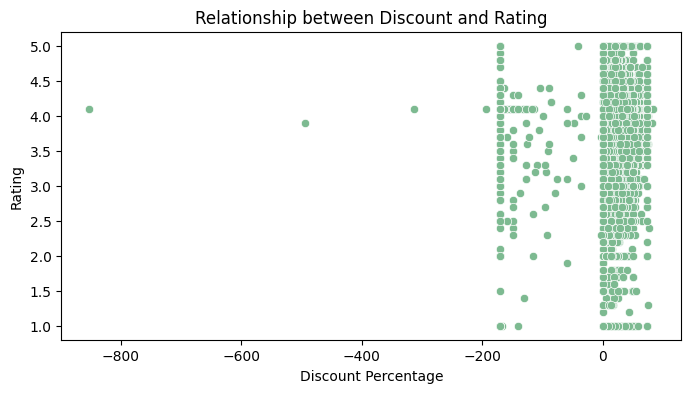

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''Discount Analysis'''
'''SCATTER PLOT: Draw a visualization to see if there's any relationship between Discount and Rating.'''

# Calculate discount percentage

df['discount_percentage'] = (df['market_price'] - df['sale_price']) / df['market_price'] * 100

# Set the color palette
colors = sns.color_palette('crest')

# Create scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='discount_percentage', y='rating', color=colors[0], data=df)
plt.title('Relationship between Discount and Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# **No Clear Correlation:** The scatter plot does not show a strong linear relationship between "Discount" percentage and "Rating".
# This suggests that offering a higher discount does not necessarily lead to a higher product rating.

# **Potential Factors:** Other factors, such as product quality, brand reputation, and customer expectations, likely play a more significant role in determining product ratings.

'''**Business Implications**'''

# **Discount Strategy:** While discounts can attract customers, they may not be the primary driver of positive product ratings.
# Focus on overall product quality and customer experience to improve ratings.

# **Targeted Promotions:** Consider offering targeted discounts based on customer preferences and product categories, rather than relying on blanket discounts.

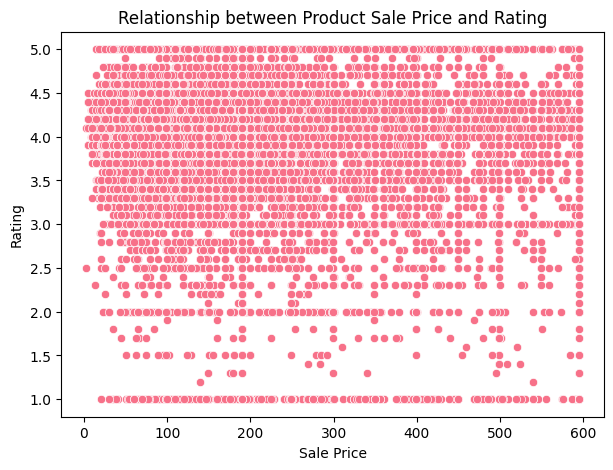

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''SCATTER PLOT: Draw a visualization to explore the relationship between Product Sale Price and Rating.'''

plt.figure(figsize=(7, 5))

# Set the color palette
colors = sns.color_palette('husl')

# Create scatter plot
sns.scatterplot(x='sale_price', y='rating', color=colors[0], data=df)
plt.title('Relationship between Product Sale Price and Rating')
plt.xlabel('Sale Price')
plt.ylabel('Rating')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# **No clear correlation:** There doesn't seem to be a strong linear relationship between product "Sale Price" and "Rating".
# This suggests that customers don't necessarily rate higher-priced products more favorably.

# **Concentration of products:** Most products are concentrated in the lower price range, regardless of their rating.
# This indicates that the majority of products offered are budget-friendly.

# **Potential outliers:** There are a few products with high prices and low ratings, which could be worth investigating further to understand why they didn't receive favorable reviews despite their cost.

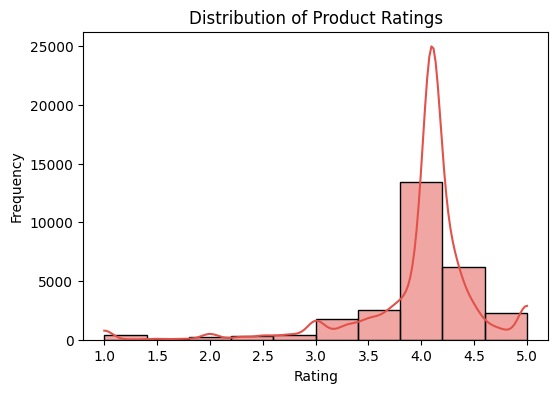

In [ ]:
'''Question 6 - Create Plots and Visualizations-'''

'''HISTOGRAM: Draw a visualization to show the Distribution of Product ratings.'''

plt.figure(figsize=(6, 4))

# Set the color palette
colors = sns.color_palette('Spectral')

# Histogram to show the distribution of product ratings.

sns.histplot(df['rating'], bins=10, kde=True, color=colors[0])
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# The distribution of product "Ratings" is heavily skewed towards higher ratings, with the majority of products receiving ratings of 4 or above.
# This suggests that customers are generally satisfied with the products being sold on the platform.

# I strongly believe that this is a significant finding as prioritizing customer satisfaction is a fundamental key to growth for service-oriented businesses.

In [ ]:
'''FINAL WORDINGS - Summarize the key findings, draw conclusions, and provide recommendations based on the insights gained from the analysis'''

'''
Key Findings:

1. Product and Category Analysis:

  - "Beauty & Hygiene" is the most dominant category, followed by "Gourmet & World Food".
  - "Skin Care" is the leading sub-category.
  - "Fresho" is the most popular brand with the highest number of products.
  - "BB Home" and "bb Royal" generate the highest total sales.

2. Discount Analysis:

  - No strong correlation between Discount percentage and product rating.
  - Product Sale price does not have a clear relationship with rating..
  - Discounts do not appear to strongly influence product ratings.

3. Rating Analysis:

  - Product ratings are heavily skewed towards higher ratings (4 or above). Which is a clear sign of customer satisfaction.
  - Customers usually gave higher ratings to products, indicating that the price, whether low or high, isn't a major concern for them. They are satisfied with the quality they receive.

General Summary of Key findings:-

- Product Distribution: The distribution of Products across Categories and Sub-categories was visualized, revealing the most and least popular Products types. Certain product categories and sub-categories are more popular than others.
- Brand Analysis: Top Brands were identified based on the number of Categories, Number of products, and Total Sales. Market share was visualized using a pie chart.
- Discount and Rating: The relationship between Discount and Rating was explored using a scatter plot, indicating no strong correlation.
- Price and Rating: Similarly, the relationship between Product Sale price and Rating was visualized, suggesting no clear trend.
- Rating Distribution: The distribution of product ratings was visualized using a histogram, showing a concentration around higher ratings.


Conclusions:

  - Big Basket's focus is on "Beauty & Hygiene" and "Gourmet & World Food" categories, with a strong emphasis on "Skin Care".
  - "Fresho" is a key brand for Big Basket, while "BB Home" and "bb Royal" are major revenue drivers.
  - These Top brands dominate the market in terms of product variety, sales, and market share.
  - Discounts don't necessarily guarantee higher ratings; product quality and customer experience are crucial.
  - Customers are mostly pleased with the products offered by Big Basket, and their overall experience is positive.

Recommendations:

  - Firstly, Big Basket should typically concentrate on promoting products in popular categories and sub-categories, as these are significant revenue generators for the brand.
  - Big Basket must expand product offerings in categories like "Fruits & Vegetables" and "Eggs, Meat & Fish" to cater to a wider audience.
  - Big Basket is supposed to leverage the popularity of "Fresho", "BB Home", and "bb Royal" for further growth.
  - It would be wise for Big Basket to identify and partner with brands to boost profits, focusing on marketing through YouTube ads and TV commercials to leverage their market presence.
  - Prioritize product quality and customer experience to maintain high ratings.
  - Big Basket is expected to consider strategies to improve ratings for products with lower ratings too.
  - Consider targeted discounts based on customer preferences and product categories.
  - Big Basket ought to continue monitoring customer satisfaction and address any potential issues promptly.

'''

In [ ]:
                                                           #'''THANK YOU FOR YOUR VALUABLE TIME'''#